#Install Dependencies

_(choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# clone YOLOv5 repository

!git clone https://github.com/ultralytics/yolov5.git  # clone repo
%cd yolov5
# !git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 15978, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 15978 (delta 89), reused 112 (delta 70), pack-reused 15831
Receiving objects: 100% (15978/15978), 14.54 MiB | 15.00 MiB/s, done.
Resolving deltas: 100% (10963/10963), done.
/content/drive/MyDrive/dataset/yolov5


In [4]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
#import torch

from IPython.display import Image, clear_output  # to display images
# from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
#print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.6/595.6 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


# Your Custom Data

In [ ]:

import os
#arr = os.listdir('.')
#print(arr)
#%cd /content/sdata
arr = os.listdir('.')
print(arr)
#!curl -L "https://github.com/vinubhat10/Sign.zip" > Sign.zip; unzip Sign.zip; rm Sign.zip
# Export code snippet and paste here
import os
import sys
#import pandas as pd

#%cd ..
%cd /content/dataset/

arr = os.listdir('.')
print(arr)
#arr = os.listdir('.')
#print(arr)
#!curl -L "https://github.com/vinubhat10/sign_language_detection/blob/main/final_data1.zip" > final_data.zip; unzip final_data.zip; rm final_data.zip[]
#!wget https://github.com/vinubhat10/SignLang.git
#arr = os.listdir('.')
#print(arr)
#%cd SignLang.git
#!unzip finadata4.zip.1
#!git clone https://github.com/vinubhat10/Sign

#from google.colab import files

#files.os.chdir('test')

# To find local version of the library
#sys.path.append(os.path.join('content/dataset', 'test'))  


#files.os.chdir('train')
#arr = os.listdir('.')
#print(arr)
#%cd /content/SignLang
#arr = os.listdir('.')
#print(arr)
# To find local version of the library
#sys.path.append(os.path.join('content/dataset', 'train'))  
# here is your import
#from mrcnn.config import Config
#%cd finadata4.zip.1
#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)
#import pandas as pd
#data=pd.read('/MyDrive/final_data')

['.config', '.ipynb_checkpoints', 'dataset', 'sample_data']
/content/dataset
['.ipynb_checkpoints', 'test', 'data.yaml', 'train']


In [5]:

import os
arr = os.listdir('.')
print(arr)
%cd ..
%cd ..
%cd content/
%cd /content/drive/MyDrive/dataset
#%cd Sign
%cat data.yaml

['.git', '.dockerignore', '.gitattributes', '.github', '.gitignore', '.pre-commit-config.yaml', 'CITATION.cff', 'CONTRIBUTING.md', 'LICENSE', 'README.md', 'README.zh-CN.md', 'benchmarks.py', 'classify', 'data', 'detect.py', 'export.py', 'hubconf.py', 'models', 'requirements.txt', 'segment', 'setup.cfg', 'train.py', 'tutorial.ipynb', 'utils', 'val.py']
/content/drive/MyDrive/dataset
/content/drive/MyDrive
[Errno 2] No such file or directory: 'content/'
/content/drive/MyDrive
/content/drive/MyDrive/dataset
train: ../train/images
val: ../test/images

nc: 20
names: ['Thanks','Hello','IloveYou','Yes','No','Please','Ask','Help','Home','Wait','Victory','Thumbsup','Thumbsdown','Okay','Namaste','Callme','Salute','Dance','Looser','Danger']

# Define Model Configuration and Architecture

write a yaml script that defines the parameters for our model like the number of classes, anchors, and each layer.



In [6]:
# define number of classes 
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [7]:
num_classes

'20'

In [8]:

%cat /content/drive/MyDrive/dataset/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [9]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [10]:
%%writetemplate /content/drive/MyDrive/dataset/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# Train Custom YOLOv5 Detector



 arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. 
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. 
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [11]:

%%time
%cd /content/drive/MyDrive/dataset/yolov5/
!python train.py --img 416 --batch 16 --epochs 600 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results  --cache

/content/drive/MyDrive/dataset/yolov5
train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=600, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=

# Evaluate Custom YOLOv5 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`. (If given no name, it defaults to `results.txt`.) The results file is plotted as a png after training completes.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

In [30]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
#%load_ext tensorboard
#!kill 39098
#%kill 39098

%reload_ext tensorboard
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 39326), started 0:07:37 ago. (Use '!kill 39326' to kill it.)

<IPython.core.display.Javascript object>

In [15]:
!nvidia-smi

Sun Jun 11 06:30:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

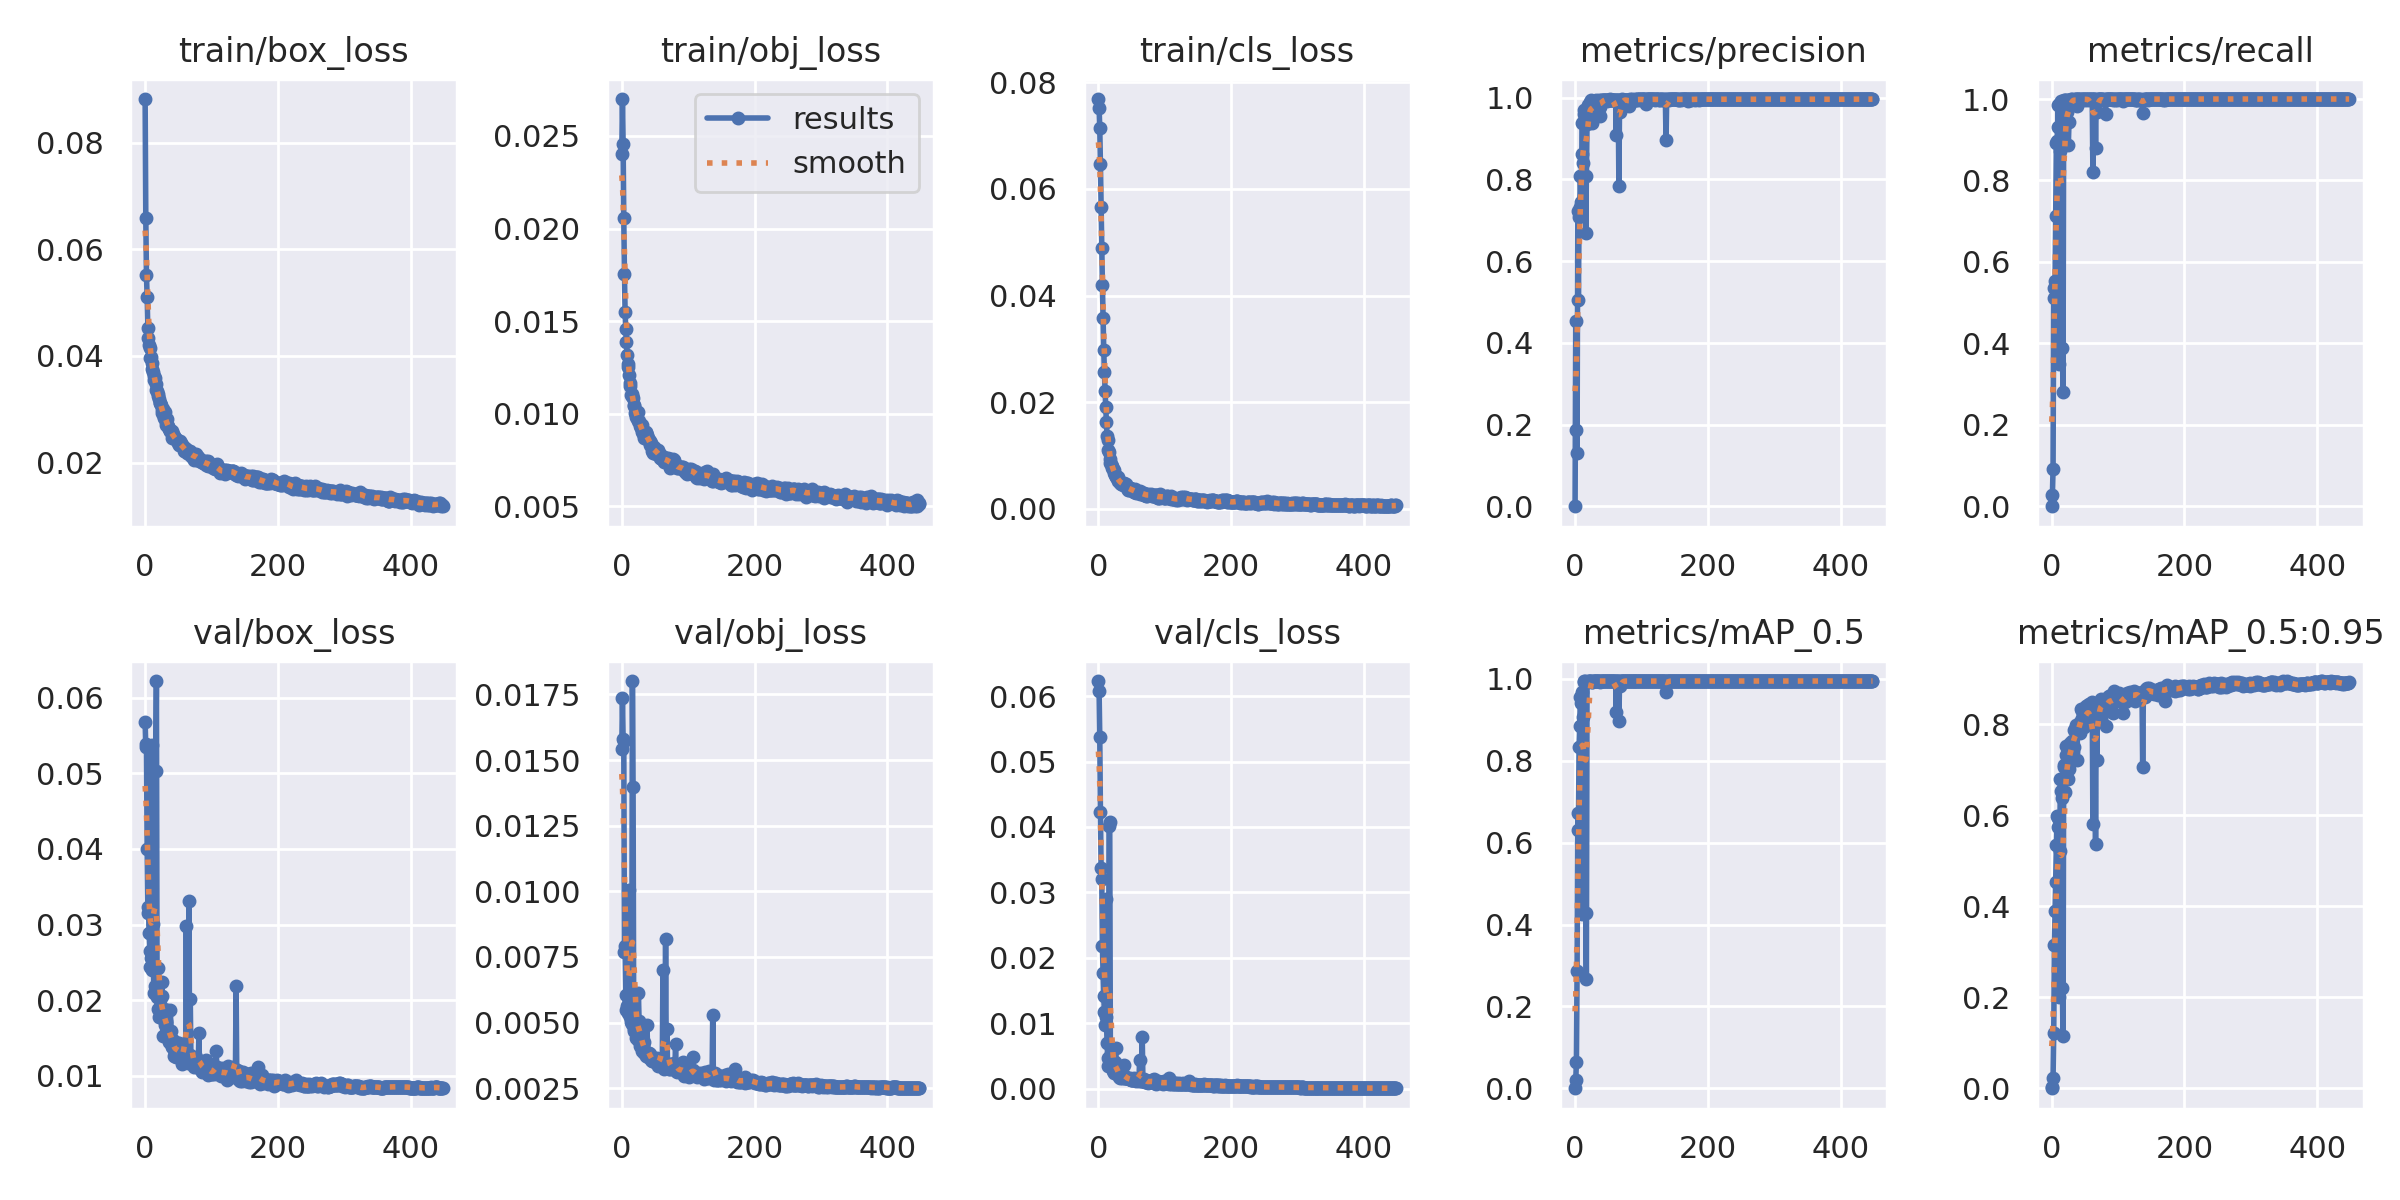

In [18]:

from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/drive/MyDrive/dataset/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

Visualizing Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.


GROUND TRUTH TRAINING DATA:


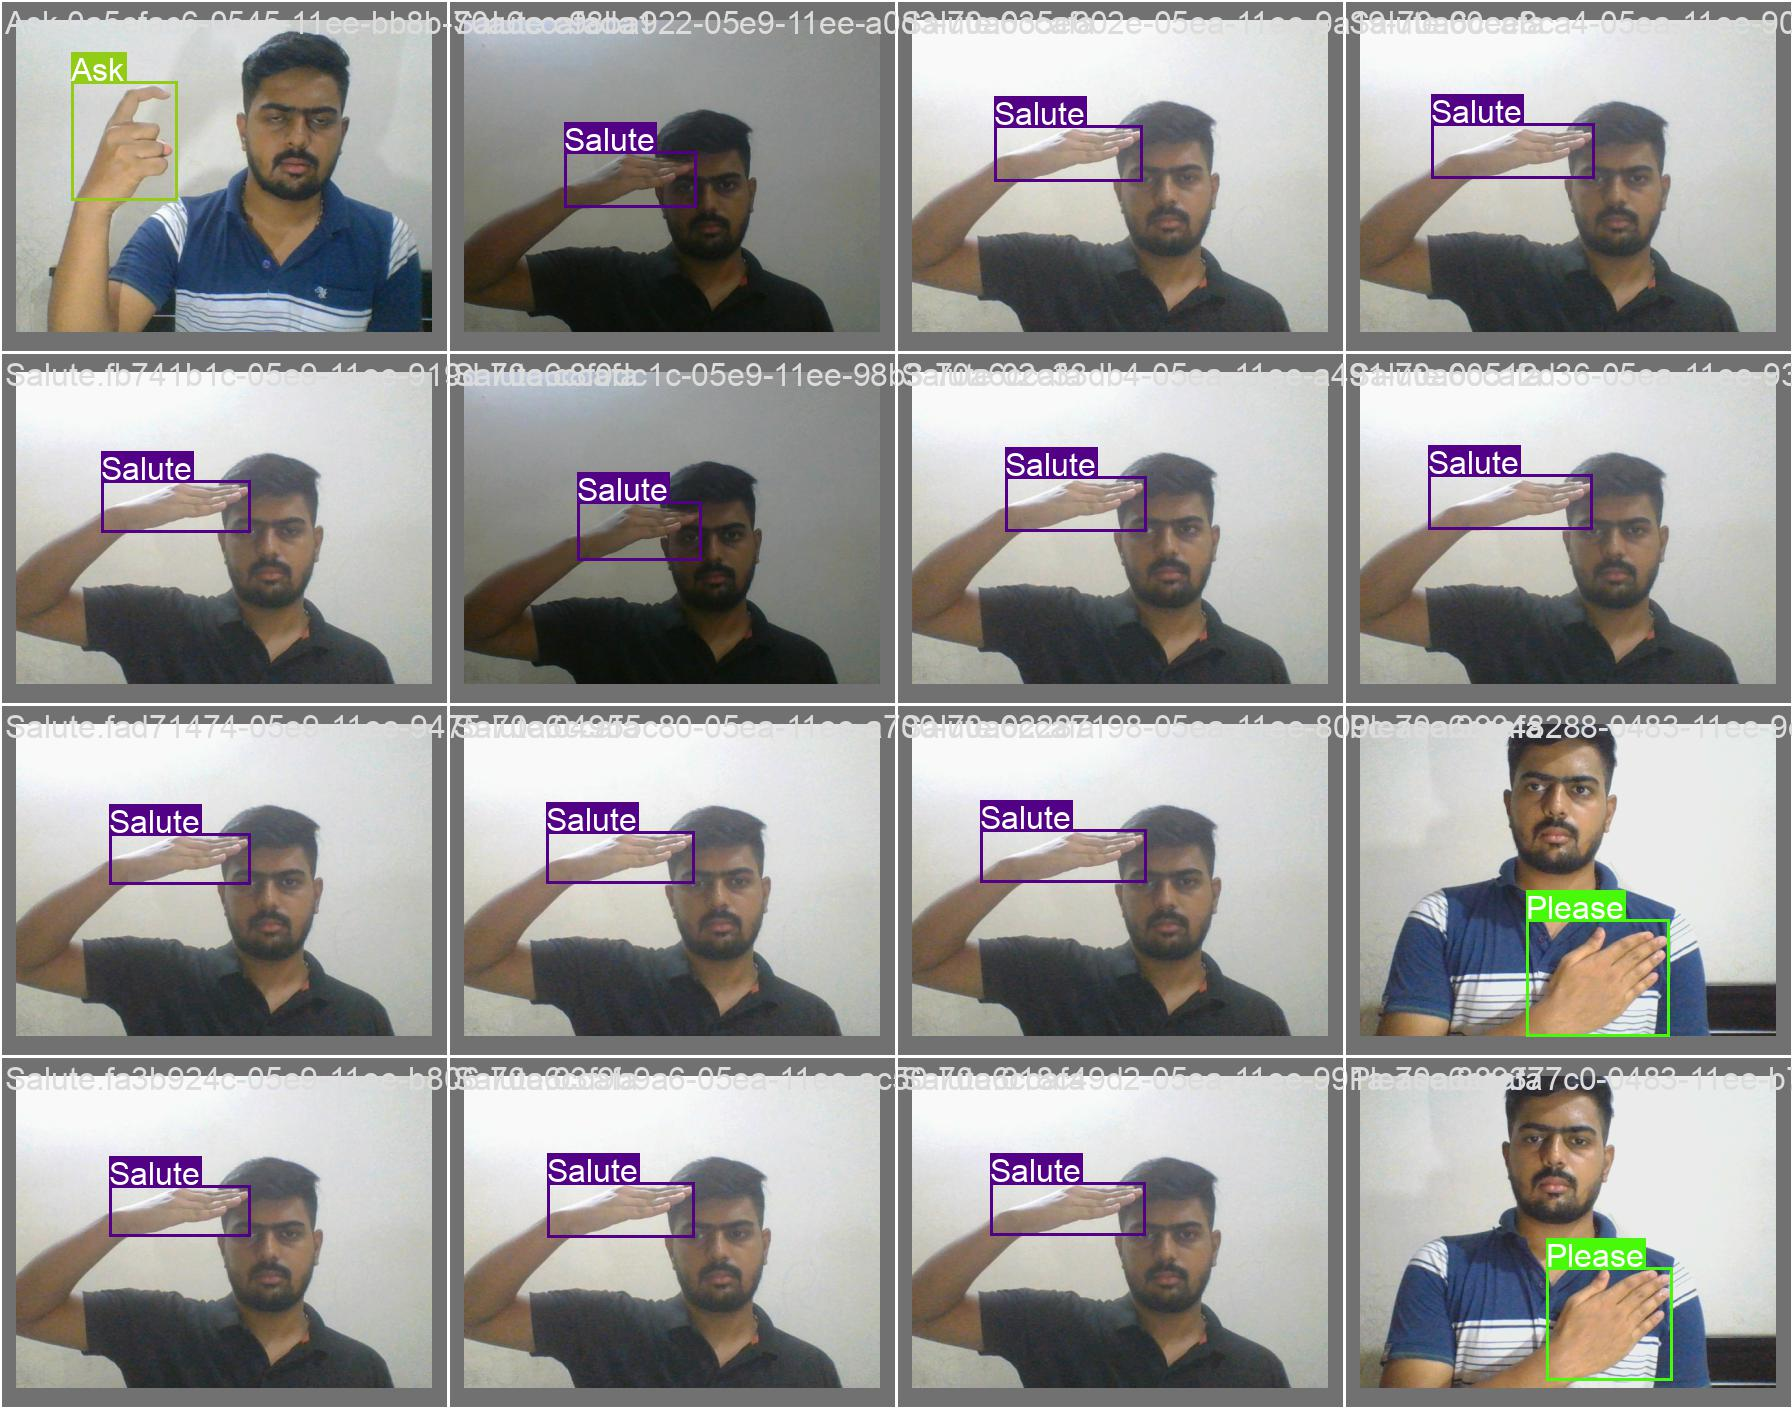

In [19]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/drive/MyDrive/dataset/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


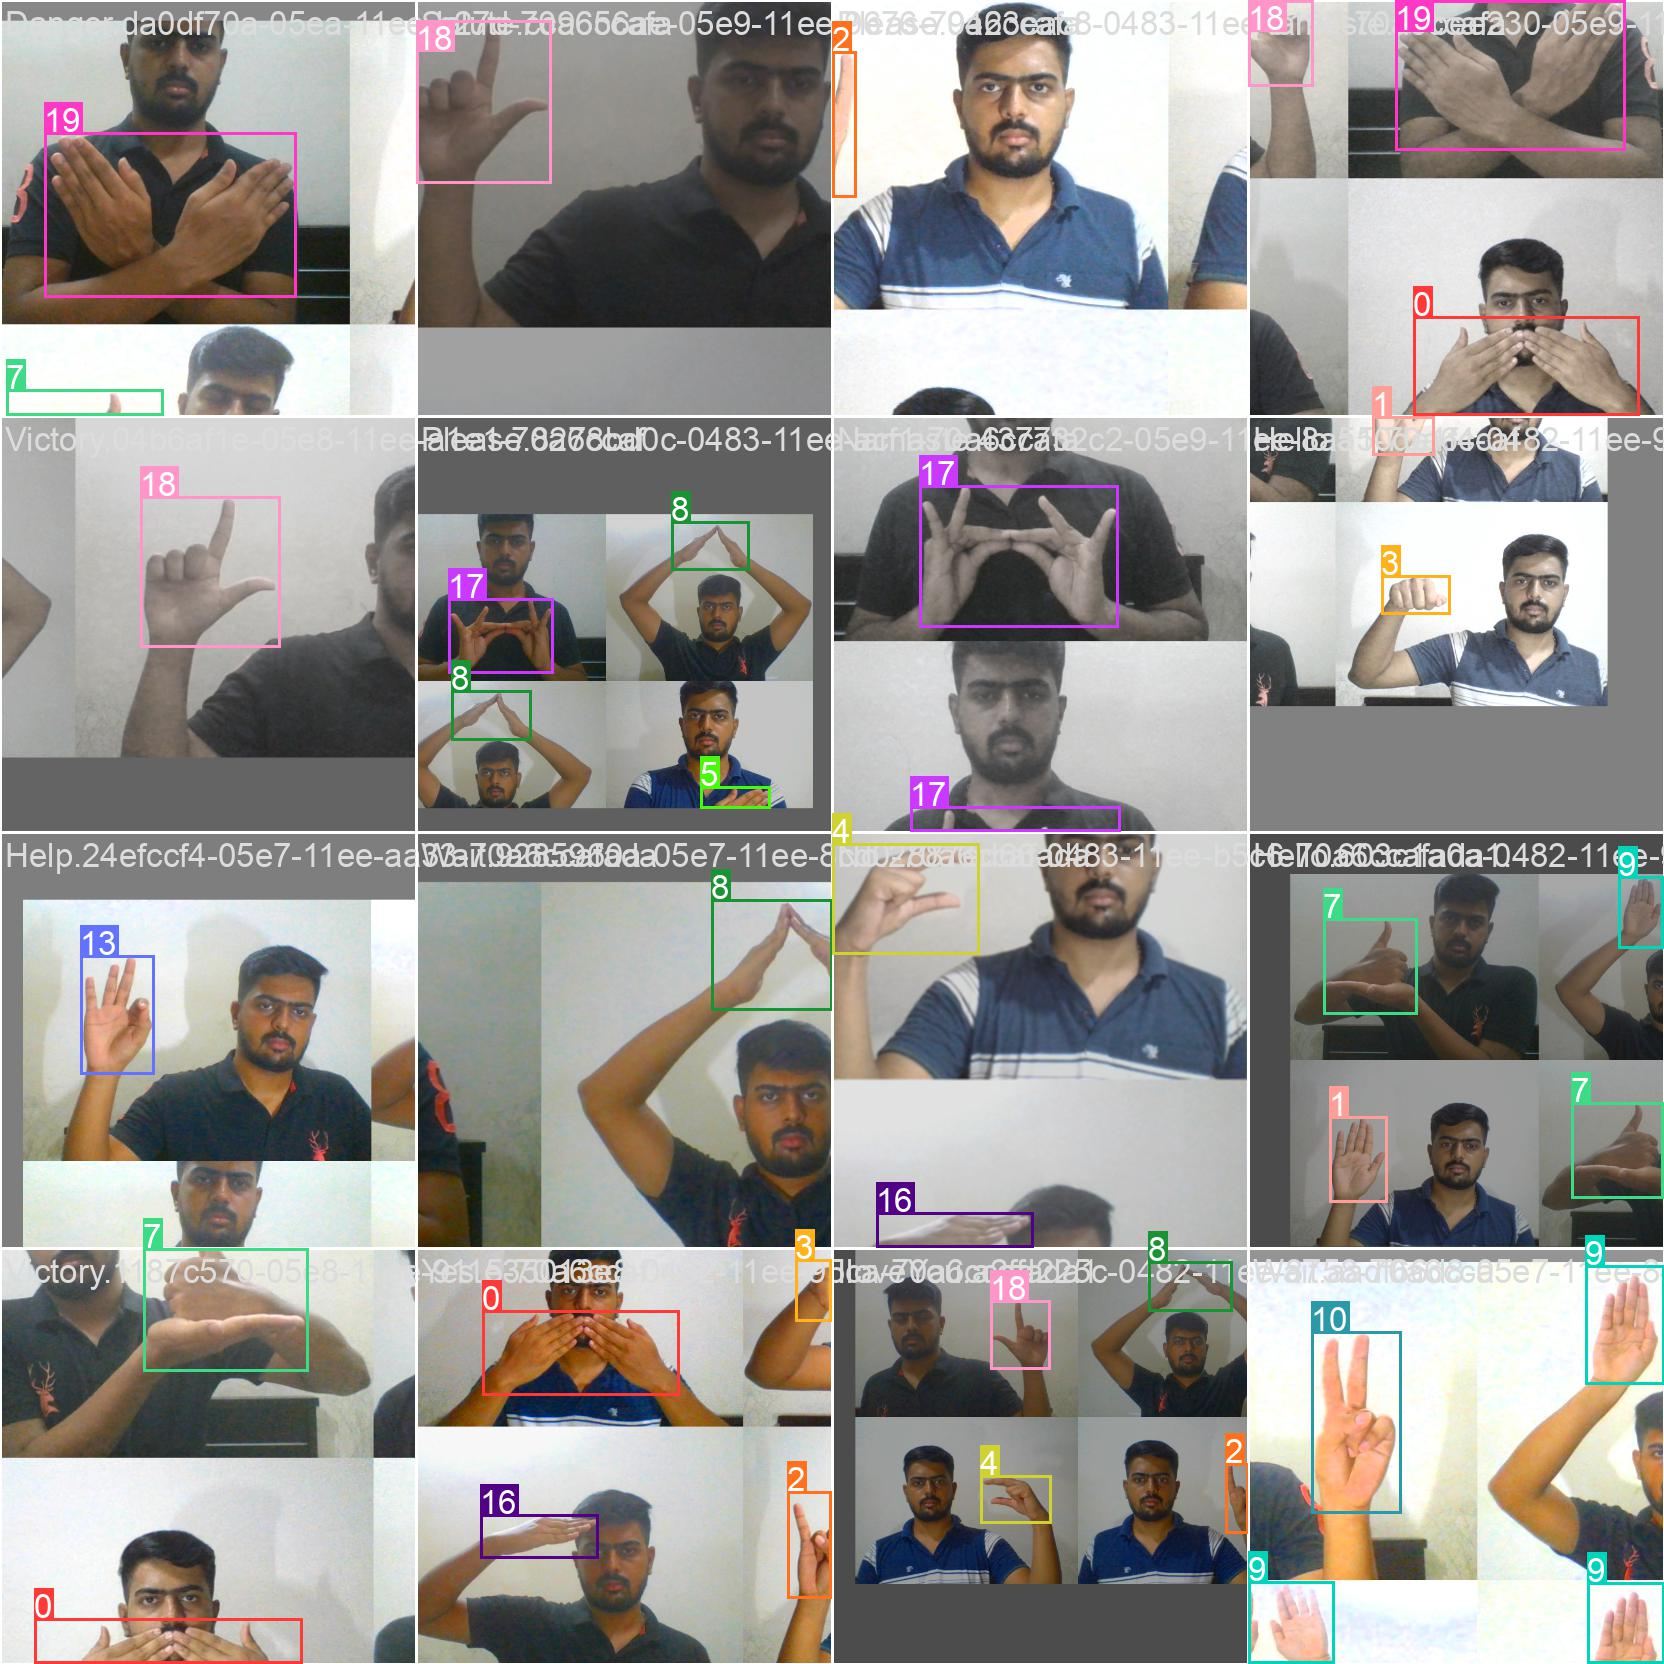

In [20]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/drive/MyDrive/dataset/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder 

In [21]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [22]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [23]:

%cd /content/drive/MyDrive/dataset/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.5 --source ../test/images

/content/drive/MyDrive/dataset/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7297761 parameters, 0 gradients
image 1/399 /content/drive/MyDrive/dataset/test/images/Ask.0a5efac6-0545-11ee-bb8b-70a6ccafada1.jpg: 320x416 1 Ask, 51.0ms
image 2/399 /content/drive/MyDrive/dataset/test/images/Ask.0afcb094-0545-11ee-9455-70a6ccafada1.jpg: 320x416 1 Ask, 6.8ms
image 3/399 /content/drive/MyDrive/dataset/test/images/Ask.0b

In [24]:
#display inference on ALL test images


import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/dataset/yolov5/runs/detect/exp*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Export Trained Weights for Future Inference

have trained custom detector, can export the trained weights 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [25]:
%cp /content/drive/MyDrive/dataset/yolov5/runs/train/yolov5s_results/weights/best.pt /content/drive/MyDrive/dataset/